In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings


plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (24,16)
plt.rc('font', family='Malgun Gothic')
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 데이터

- 서울시 평균이용량(http://data.seoul.go.kr/dataList/OA-15182/F/1/datasetView.do)
    - 대여소번호에 따라 이용량 도출  
    - 대여소 별 이용량 / 대여소 별 유지기간  = 대여소 별 일별 이용량 도출  


- 서울시 지리정보 데이터 종합(QGIS를 통한 데이터 전처리 후 하나의 파일로 전처리)
     - 지역경계(모든 읍/면/동 경계에 대한 공간정보 및 속성정보)  
         - http://data.nsdi.go.kr/dataset/20171206ds00001  
     - 도로(도로의 시점과 종점, 도로명부여의 기본정보 )  
         - http://data.nsdi.go.kr/dataset/12902  
     - 건물(GIS 건물통합정보)  
         - http://openapi.nsdi.go.kr/nsdi/eios/ServiceDetail.do?svcSe=F&svcId=F010  
     - 경사도(수치표고모델 지형의 고도값을 수치로 저장함으로써 지형의 형상을 나타내는 지도)  
          -http://data.nsdi.go.kr/dataset/20001   
     - 인구(서울시 주민등록인구 (연령별/동별) 통계)  
         - https://data.seoul.go.kr/dataList/10727/S/2/datasetView.do  
     - 지하철(서울시 지하철 좌표데이터 )  
          - https://observablehq.com/@taekie/seoul_subway_station_coordinate  
     - 버스(서울시 버스정류소 좌표데이터)  
         - http://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do  
     - 공원(생활권,생활서비스 시설(공원) 정보)  
          - http://data.seoul.go.kr/dataList/OA-15529/S/1/datasetView.do#   
     - 대학교(전국 대학교 위치 정보 )  
          - http://data.nsdi.go.kr/dataset/14763 

In [2]:
usage = pd.read_csv("C:/Users/keogu/Desktop/IGPS/Data/Seoul_Public_Bicycle_Usage.csv")
seoul = pd.read_csv("C:/Users/keogu/Desktop/IGPS/Data/Seoul_GIS.csv", encoding = 'cp949')

# 서울시 평균이용량

In [3]:
usage

,대여소번호,총대여건수,총반납건수,총이용량,19년도총이용량,20년도총이용량,유지기간,일별평균이용량,일별대여평균이용량,일별반납평균이용량
0,101.0,14919.0,14714.0,29633.0,17607.0,12026.0,730.0,40.593151,20.436986,20.156164
1,102.0,59082.0,54010.0,113092.0,67430.0,45662.0,730.0,154.920548,80.934247,73.986301
2,103.0,40655.0,38358.0,79013.0,46153.0,32860.0,730.0,108.236986,55.691781,52.545205
3,104.0,34652.0,30358.0,65010.0,39840.0,25170.0,730.0,89.054795,47.468493,41.586301
4,105.0,20565.0,18317.0,38882.0,20860.0,18022.0,730.0,53.263014,28.171233,25.091781
...,...,...,...,...,...,...,...,...,...,...
1506,3538.0,11992.0,9568.0,21560.0,9306.0,12254.0,730.0,29.534247,16.427397,13.106849
1507,3539.0,2457.0,2353.0,4810.0,1845.0,2965.0,730.0,6.589041,3.365753,3.223288
1508,3541.0,56642.0,42544.0,99186.0,54554.0,44632.0,730.0,135.871233,77.591781,58.279452
1509,3542.0,25905.0,20227.0,46132.0,26719.0,19413.0,730.0,63.194521,35.486301,27.708219


In [4]:
usage.describe()

,대여소번호,총대여건수,총반납건수,총이용량,19년도총이용량,20년도총이용량,유지기간,일별평균이용량,일별대여평균이용량,일별반납평균이용량
count,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000
mean,1300.999338,20075.628061,18305.033091,38380.661152,19327.982131,19052.679021,716.252151,65.408182,34.127892,31.280290
std,815.275728,17581.136413,16131.538867,33501.494135,17100.730083,17137.696889,88.329564,159.577072,82.369919,77.720766
min,101.000000,179.000000,161.000000,340.000000,9.000000,266.000000,19.000000,0.950685,0.583562,0.286301
25%,583.500000,9347.500000,7946.500000,17336.500000,8106.000000,8643.000000,730.000000,24.070548,12.857534,11.009589
50%,1229.000000,16168.000000,14644.000000,30573.000000,15138.000000,15155.000000,730.000000,42.406849,22.436986,20.246575
75%,1959.500000,25921.500000,24202.500000,50333.000000,25806.500000,24900.000000,730.000000,70.402740,36.439726,33.984932
max,3543.000000,317792.000000,201692.000000,505278.000000,218286.000000,286992.000000,914.000000,3648.250000,1917.150000,1731.100000


## 이상치 제거

In [5]:
usage.set_index(['대여소번호'], inplace=True)

In [6]:
# 이상치들 존재
# 일별 평균이용량에 맞지 않는 값들 존재
usage.sort_values(by=['일별대여평균이용량'], ascending=False)

,총대여건수,총반납건수,총이용량,19년도총이용량,20년도총이용량,유지기간,일별평균이용량,일별대여평균이용량,일별반납평균이용량
대여소번호,,,,,,,,,
1124.0,38343.0,34622.0,72965.0,35963.0,37002.0,20.0,3648.250000,1917.150000,1731.100000
905.0,25550.0,27726.0,53276.0,25616.0,27660.0,19.0,2804.000000,1344.736842,1459.263158
152.0,114259.0,122056.0,236315.0,116086.0,120229.0,98.0,2411.377551,1165.908163,1245.469388
583.0,317792.0,187486.0,505278.0,218286.0,286992.0,914.0,1719.118865,1081.230971,637.887895
2348.0,25729.0,24968.0,50697.0,25849.0,24848.0,37.0,1370.189189,695.378378,674.810811
...,...,...,...,...,...,...,...,...,...
2286.0,1096.0,230.0,1326.0,710.0,616.0,730.0,1.816438,1.501370,0.315068
2395.0,866.0,554.0,1420.0,943.0,477.0,730.0,1.945205,1.186301,0.758904
2288.0,682.0,396.0,1078.0,650.0,428.0,730.0,1.476712,0.934247,0.542466


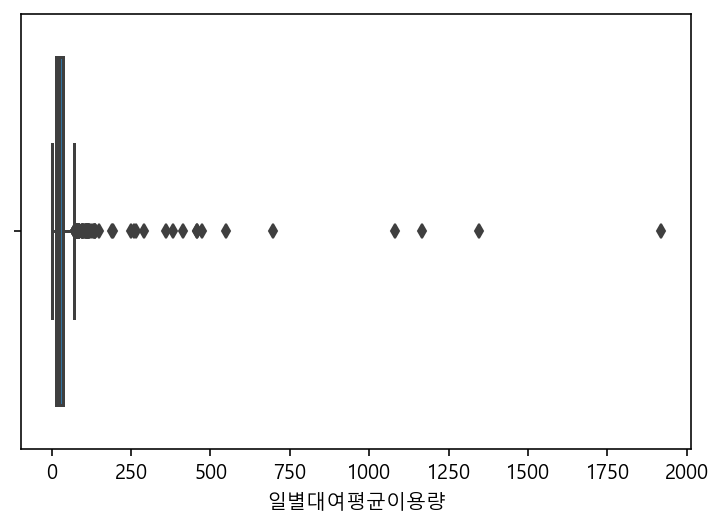

In [7]:
sns.boxplot(x = '일별대여평균이용량', data=usage)
plt.show()

In [8]:
# 이상치 제거 함수
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [9]:
outlier_index = get_outlier(df=usage, column='일별대여평균이용량', weight=1.5)
len(outlier_index)

76

In [10]:
# 유지기간이 1년 이하 2년 이상인 대여소 제거
len(usage[(usage['유지기간'] < 365)|(usage['유지기간'] > 730)])

29

In [11]:
index = usage[(usage['유지기간'] < 365)|(usage['유지기간'] > 730)].index

In [12]:
index

Float64Index([ 115.0,  134.0,  152.0,  222.0,  331.0,  394.0,  431.0,  447.0,
               543.0,  583.0,  593.0,  642.0,  710.0,  744.0,  905.0, 1018.0,
              1124.0, 1267.0, 1268.0, 1373.0, 1630.0, 1713.0, 1825.0, 1857.0,
              2140.0, 2244.0, 2348.0, 2394.0, 3509.0],
             dtype='float64', name='대여소번호')

In [13]:
# 최종 서울시 공공자전거 평균 이용량
usage.drop(index, axis=0, inplace=True)
usage

,총대여건수,총반납건수,총이용량,19년도총이용량,20년도총이용량,유지기간,일별평균이용량,일별대여평균이용량,일별반납평균이용량
대여소번호,,,,,,,,,
101.0,14919.0,14714.0,29633.0,17607.0,12026.0,730.0,40.593151,20.436986,20.156164
102.0,59082.0,54010.0,113092.0,67430.0,45662.0,730.0,154.920548,80.934247,73.986301
103.0,40655.0,38358.0,79013.0,46153.0,32860.0,730.0,108.236986,55.691781,52.545205
104.0,34652.0,30358.0,65010.0,39840.0,25170.0,730.0,89.054795,47.468493,41.586301
105.0,20565.0,18317.0,38882.0,20860.0,18022.0,730.0,53.263014,28.171233,25.091781
...,...,...,...,...,...,...,...,...,...
3538.0,11992.0,9568.0,21560.0,9306.0,12254.0,730.0,29.534247,16.427397,13.106849
3539.0,2457.0,2353.0,4810.0,1845.0,2965.0,730.0,6.589041,3.365753,3.223288
3541.0,56642.0,42544.0,99186.0,54554.0,44632.0,730.0,135.871233,77.591781,58.279452


# 서울시 지리정보

In [14]:
seoul.head()

,Unnamed: 0,대여소번호,일별평균이용량,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이
0,0,502.0,534.895890,0.0,0.00,0.00,0.0,906.60,0.0,137575.50,0.00,137.510195,1430.131460,55.873032,59.208388,0.500000,24085,714.440640
1,1,207.0,489.505479,0.0,161.73,0.00,0.0,0.00,0.0,62279.03,0.00,209.972349,2254.225628,72.001620,31.257419,1.000000,15710,356.416445
2,2,583.0,346.080822,0.0,1932.80,0.00,0.0,4184.18,0.0,59977.04,0.00,233.562697,1087.731522,197.716089,47.019980,0.571429,30156,520.130672
3,3,3533.0,239.726027,0.0,5763.49,4697.48,0.0,0.00,0.0,1152.39,90429.46,161.743567,639.201940,175.855911,42.881442,0.000000,43626,549.726995
4,4,152.0,2411.377551,0.0,954.10,0.00,0.0,0.00,0.0,30110.49,0.00,99.606355,2534.786324,899.273615,53.992085,0.500000,21319,739.718938


In [15]:
seoul.drop(['Unnamed: 0','일별평균이용량'], axis=1,inplace=True)
seoul.set_index(['대여소번호'], inplace=True)

In [16]:
seoul.drop(index, axis=0, inplace=True)

In [17]:
seoul

,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이
대여소번호,,,,,,,,,,,,,,,
502.0,0.00,0.00,0.00,0.0,906.60,0.0,137575.50,0.00,137.510195,1430.131460,55.873032,59.208388,0.500000,24085,714.440640
207.0,0.00,161.73,0.00,0.0,0.00,0.0,62279.03,0.00,209.972349,2254.225628,72.001620,31.257419,1.000000,15710,356.416445
3533.0,0.00,5763.49,4697.48,0.0,0.00,0.0,1152.39,90429.46,161.743567,639.201940,175.855911,42.881442,0.000000,43626,549.726995
1210.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,324.671476,2761.514679,145.087355,70.406036,0.333333,24052,348.694407
1308.0,39658.62,27219.63,552.09,0.0,3227.37,0.0,8097.88,0.00,332.366534,749.646476,408.450803,12.103377,1.250000,41364,1258.678353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664.0,61560.86,0.00,7622.29,0.0,0.00,0.0,0.00,0.00,332.212513,88.481654,592.515746,370.864704,2.000000,8727,0.000000
2287.0,0.00,3830.38,0.00,0.0,0.00,0.0,4749.01,0.00,187.100314,5396.477786,3469.661173,272.330166,7.444444,8164,749.655227
2391.0,0.00,0.00,0.00,0.0,0.00,0.0,3456.00,0.00,366.727904,4119.802431,1206.457463,144.812218,4.500000,14769,345.607938


# 최종데이터

In [18]:
total = seoul.join(usage[['일별대여평균이용량']], how='left')

In [19]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1482 entries, 502.0 to 3543.0
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   교육시설_sum      1482 non-null   float64
 1   근린생활시설_sum    1482 non-null   float64
 2   문화시설_sum      1482 non-null   float64
 3   숙박시설_sum      1482 non-null   float64
 4   업무시설_sum      1482 non-null   float64
 5   의료시설_sum      1482 non-null   float64
 6   주거시설_sum      1482 non-null   float64
 7   판매시설_sum      1482 non-null   float64
 8   공원_distance   1482 non-null   float64
 9   대학교_distance  1482 non-null   float64
 10  지하철_distance  1482 non-null   float64
 11  버스_distance   1482 non-null   float64
 12  경사도_mean      1482 non-null   float64
 13  거주인구          1482 non-null   int64  
 14  도로길이          1482 non-null   float64
 15  일별대여평균이용량     1482 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 229.1 KB


In [20]:
total

,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이,일별대여평균이용량
대여소번호,,,,,,,,,,,,,,,,
502.0,0.00,0.00,0.00,0.0,906.60,0.0,137575.50,0.00,137.510195,1430.131460,55.873032,59.208388,0.500000,24085,714.440640,258.605479
207.0,0.00,161.73,0.00,0.0,0.00,0.0,62279.03,0.00,209.972349,2254.225628,72.001620,31.257419,1.000000,15710,356.416445,250.934247
3533.0,0.00,5763.49,4697.48,0.0,0.00,0.0,1152.39,90429.46,161.743567,639.201940,175.855911,42.881442,0.000000,43626,549.726995,135.227397
1210.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,324.671476,2761.514679,145.087355,70.406036,0.333333,24052,348.694407,133.017808
1308.0,39658.62,27219.63,552.09,0.0,3227.37,0.0,8097.88,0.00,332.366534,749.646476,408.450803,12.103377,1.250000,41364,1258.678353,117.180822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664.0,61560.86,0.00,7622.29,0.0,0.00,0.0,0.00,0.00,332.212513,88.481654,592.515746,370.864704,2.000000,8727,0.000000,7.950860
2287.0,0.00,3830.38,0.00,0.0,0.00,0.0,4749.01,0.00,187.100314,5396.477786,3469.661173,272.330166,7.444444,8164,749.655227,0.664384
2391.0,0.00,0.00,0.00,0.0,0.00,0.0,3456.00,0.00,366.727904,4119.802431,1206.457463,144.812218,4.500000,14769,345.607938,0.583562


In [21]:
# 데이터 저장
total.to_csv("C:/Users/keogu/Desktop/IGPS/Data/Seoul_Total.csv")